# Perkenalan
- - -
1. Latar belakang memilih kasus
2. Data yang digunakan (jumlah data, kelas, sumber)
3. *Objective* yang ingin dicapai
4. *Authors* dan *Creators*

###1. Latar belakang memilih kasus

Pemilihan kasus pada projek kali ini berdasarkan banyaknya pengguna yang memakai credit card yang membuat segmentasi pelanggan diharuskan untuk selalu ditingkatkan. Maka clustering algoritma pada projek ini dapat membantu untuk menentukan strategi pemasaran berdasarkan cluster yang dihasilkan.

###2. Data yang digunakan

Data yang digunakan pada proyek kali ini yakni dataset yang bersumber dari Kaggle dengan judul ["Credit Card Dataset for Clustering"](https://www.kaggle.com/arjunbhasin2013/ccdata)


Dataset ini berisikan 18 variabel perilaku dari 8950 pelanggan Bank.

###3. *Objective* yang ingin dicapai

*Objective* yang ingin dicapai pada analisis ini yaitu:
1. mengetahui jumlah kluster yang optimal untuk segmentasi pelanggan
2. melakukan klusterisasi pelanggan Bank

### 4. *Authors* dan *Creators*

1. Joesoef Septadi Wijaya
2. Ima Nur Firda Alma'ida
3. Intan Amelia

PYTN-KS013


Studi Independen - Kampus Merdeka

#Import Libraries

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.3 MB/s eta 0:00:00


In [ ]:
pip install clusterpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for clusterpy: filename=clusterPy-0.9.9-py3-none-any.whl size=93366 sha256=51724bf7d2568449b69491a34fa7711d053e5a6376667fd3602123ffc9cd2d92
  Stored in directory: /root/.cache/pip/wheels/0e/8e/2c/3ffd2507c4c9550490c954eefa33ce2c08ae556dde800f3e9e
Successfully built clusterpy


In [ ]:
# Data Loading
import pandas as pd
import numpy as np

# Modelling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler, normalize
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
#from pyclustering.cluster.clarans import clarans

# Model Performance
from sklearn.metrics import silhouette_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Other
import pickle

#Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DatasetH8/CC GENERAL.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#Data Cleaning dan Eksplorasi Data

##Menghapus kolom yang tidak diperlukan

In [ ]:
df.drop(columns = ['CUST_ID'], inplace = True)

##Melihat banyaknya missing values dan duplikat data

In [ ]:
# Melakukan pengecekan missing values
missingvalues = pd.DataFrame(df.isnull().sum(),columns = ['Number Of Null'])
missingvalues['Percentage'] = missingvalues['Number Of Null']/df.shape[0]*100
missingvalues

,Number Of Null,Percentage
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
ONEOFF_PURCHASES_FREQUENCY,0,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.000000
CASH_ADVANCE_FREQUENCY,0,0.000000


In [ ]:
# Melakukan pengecekan duplikasi data
df.duplicated().sum()

0

In [ ]:
#Melakukan pengisian missing values
df.fillna(df.mean(), inplace = True)

In [ ]:
# Melihat banyaknya unique values untuk tiap atribut
for col in df.columns:
  print(col,':',df[col].nunique())

BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 206
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8637
PRC_FULL_PAYMENT : 47
TENURE : 7


##Rename nama kolom

In [ ]:
df.rename(lambda x: x.lower().replace(' ', '_'), axis = 1, inplace = True)

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
binary_categorical_features = [feature for feature in categorical_features if len(df[feature].unique()) <=3]
print("Numerical Features : {}".format(len(numerical_features)))
print("Discrete features : {}".format(len(discrete_features)))
print("Continuous features : {}".format(len(continuous_features)))
print("Categorical features : {}".format(len(categorical_features)))
print("Binary Categorical features : {}".format(len(binary_categorical_features)))

Numerical Features : 17
Discrete features : 1
Continuous features : 16
Categorical features : 0
Binary Categorical features : 0


In [ ]:
outliers_features = [feature for feature in continuous_features if feature not in ['Sunshine','Humidity3pm']]
print(outliers_features)

['balance', 'balance_frequency', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment']


In [ ]:
for col in df.columns:
    print(col,': ')
    print(df[col].value_counts())
    print("  ")
    print("  ")

balance : 
0.000000       80
40.900749       1
1213.551338     1
1253.188317     1
5058.299635     1
               ..
8791.161142     1
2320.402196     1
7215.745096     1
1013.233120     1
372.708075      1
Name: balance, Length: 8871, dtype: int64
  
  
balance_frequency : 
1.000000    6211
0.909091     410
0.818182     278
0.727273     223
0.545455     219
0.636364     209
0.454545     172
0.363636     170
0.272727     151
0.181818     146
0.000000      80
0.090909      67
0.833333      60
0.875000      57
0.900000      55
0.888889      53
0.857143      51
0.500000      40
0.666667      37
0.333333      22
0.777778      22
0.800000      20
0.571429      19
0.750000      17
0.714286      15
0.700000      13
0.625000      11
0.555556      10
0.400000      10
0.375000       9
0.125000       9
0.200000       9
0.300000       9
0.250000       8
0.100000       8
0.285714       8
0.142857       7
0.444444       7
0.166667       7
0.600000       6
0.222222       5
0.428571       5
0.111111

In [ ]:
df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
def plot_boxplot(df, continuous_features):
    data = df[continuous_features].copy()
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,40))
    fig.subplots_adjust(hspace=0.7)
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
    plt.show()

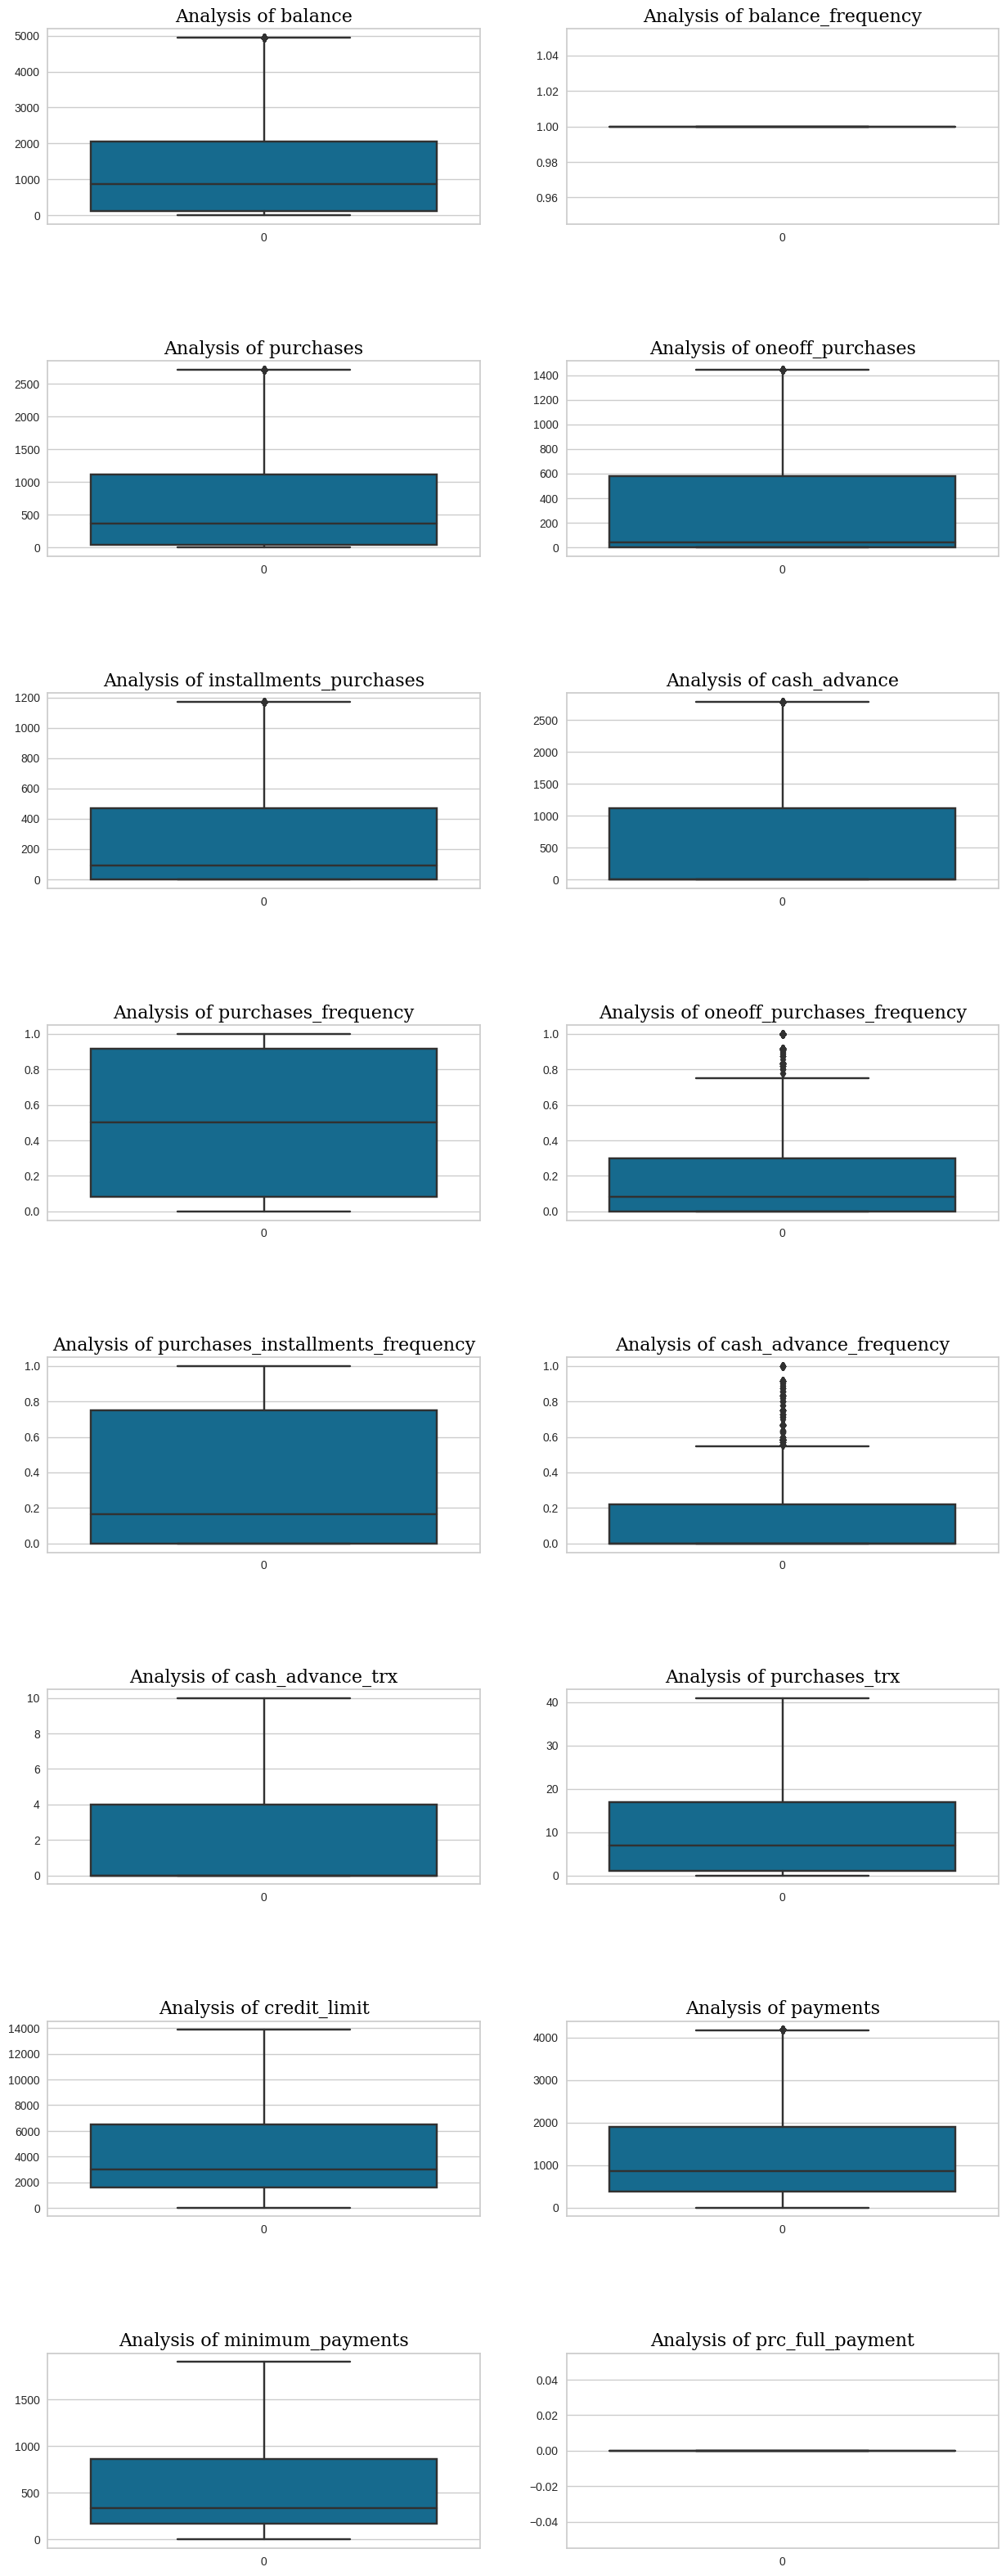

In [ ]:
plot_boxplot(df, continuous_features)

In [ ]:
def remove_outliers(df,outliers_features):
    data = df.copy()

    for feature in data[outliers_features].columns:
        Q3 = data[feature].quantile(0.75)
        Q1 = data[feature].quantile(0.25)
        IQR = Q3 - Q1
        lower = round(Q1 - 1.5 * IQR)
        upper = round(Q3 + 1.5 * IQR)
        data.loc[data[feature]>= upper,feature] = upper
        data.loc[data[feature]<=lower,feature] = lower
    return data

In [ ]:
df = remove_outliers(df,outliers_features)

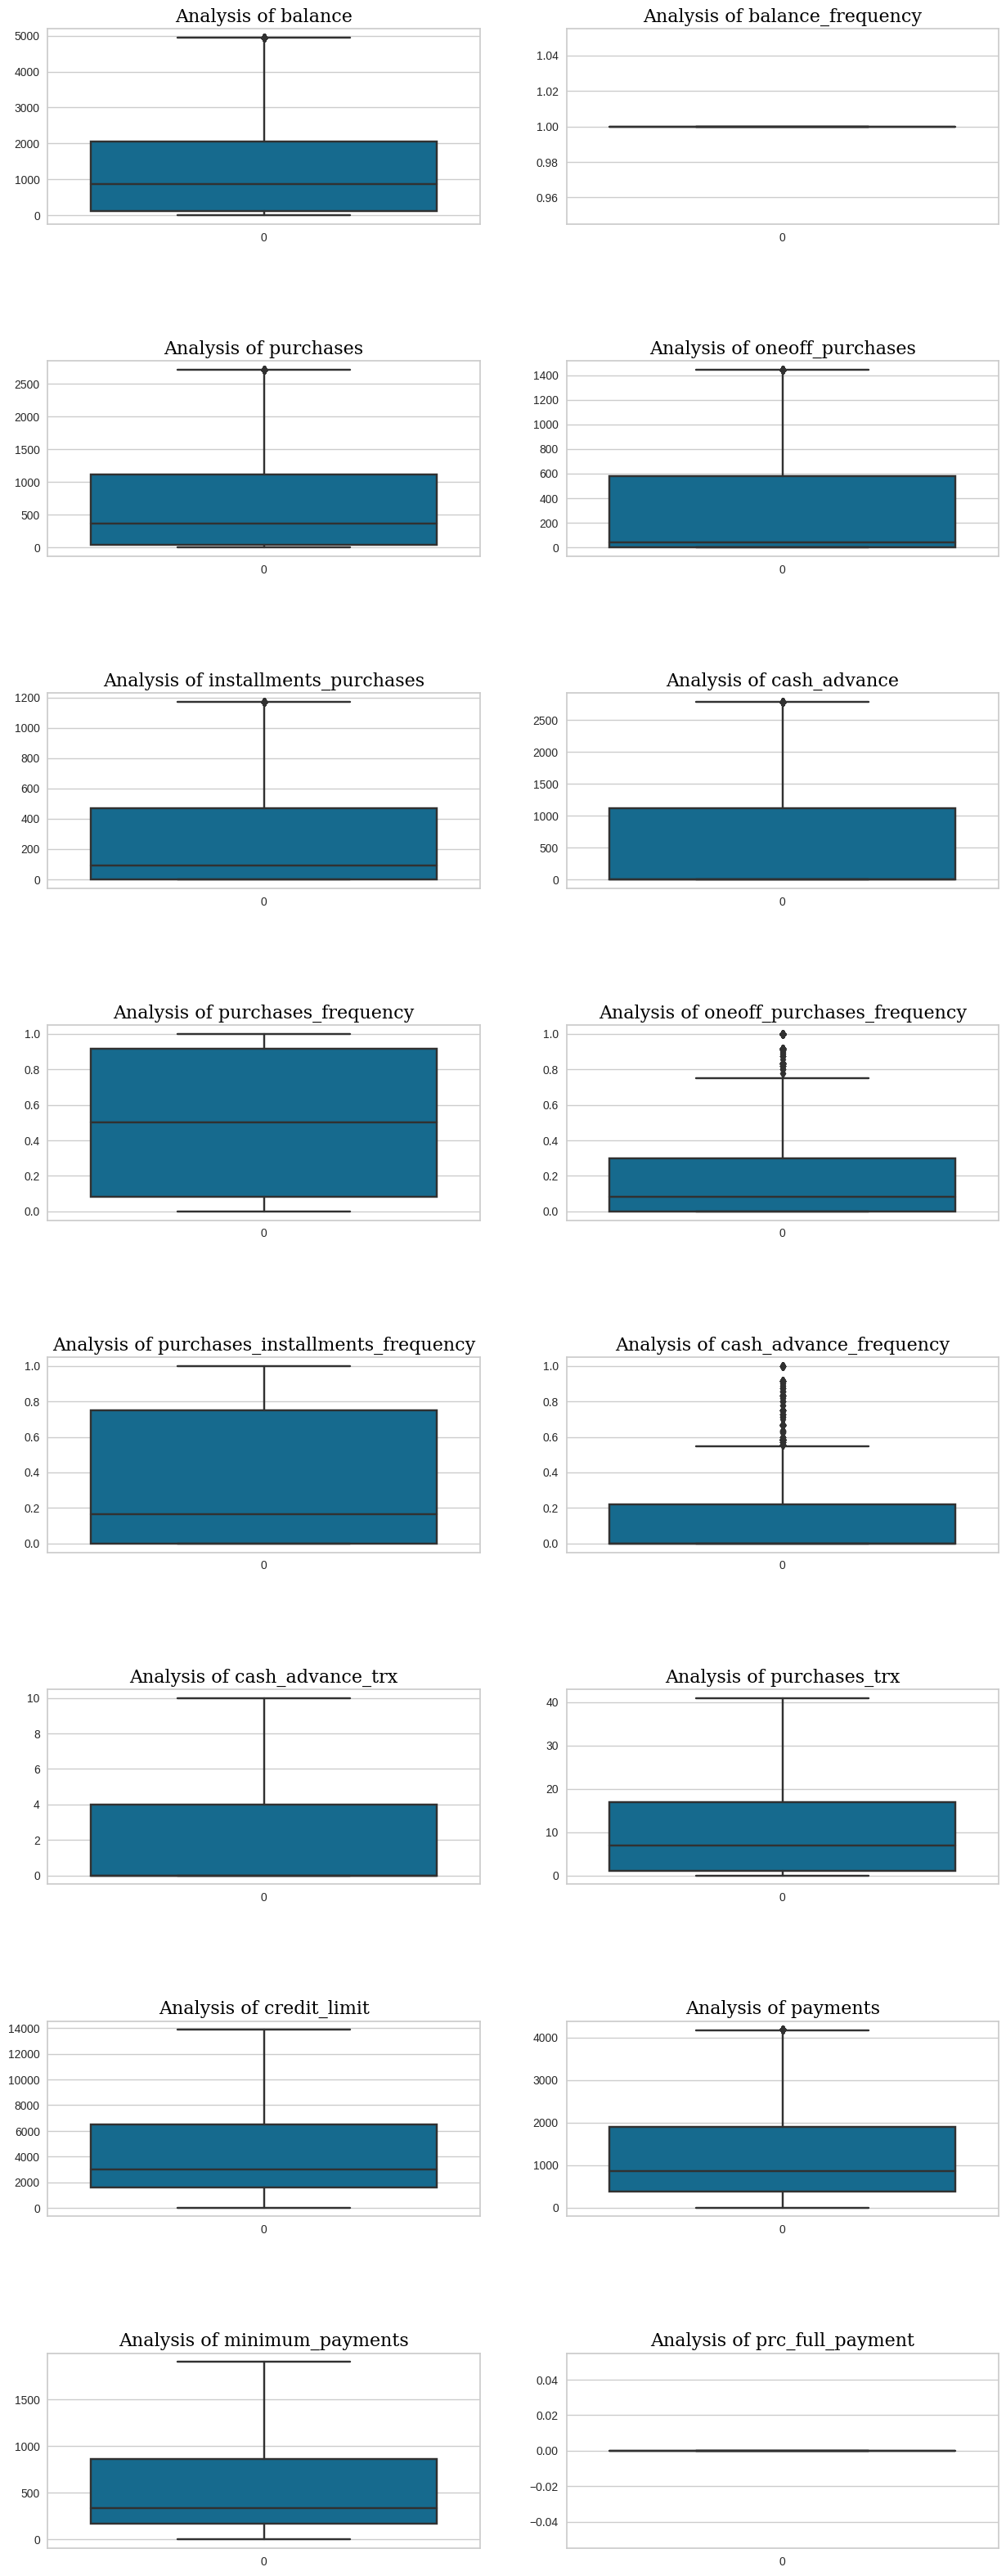

In [ ]:
plot_boxplot(df, continuous_features)

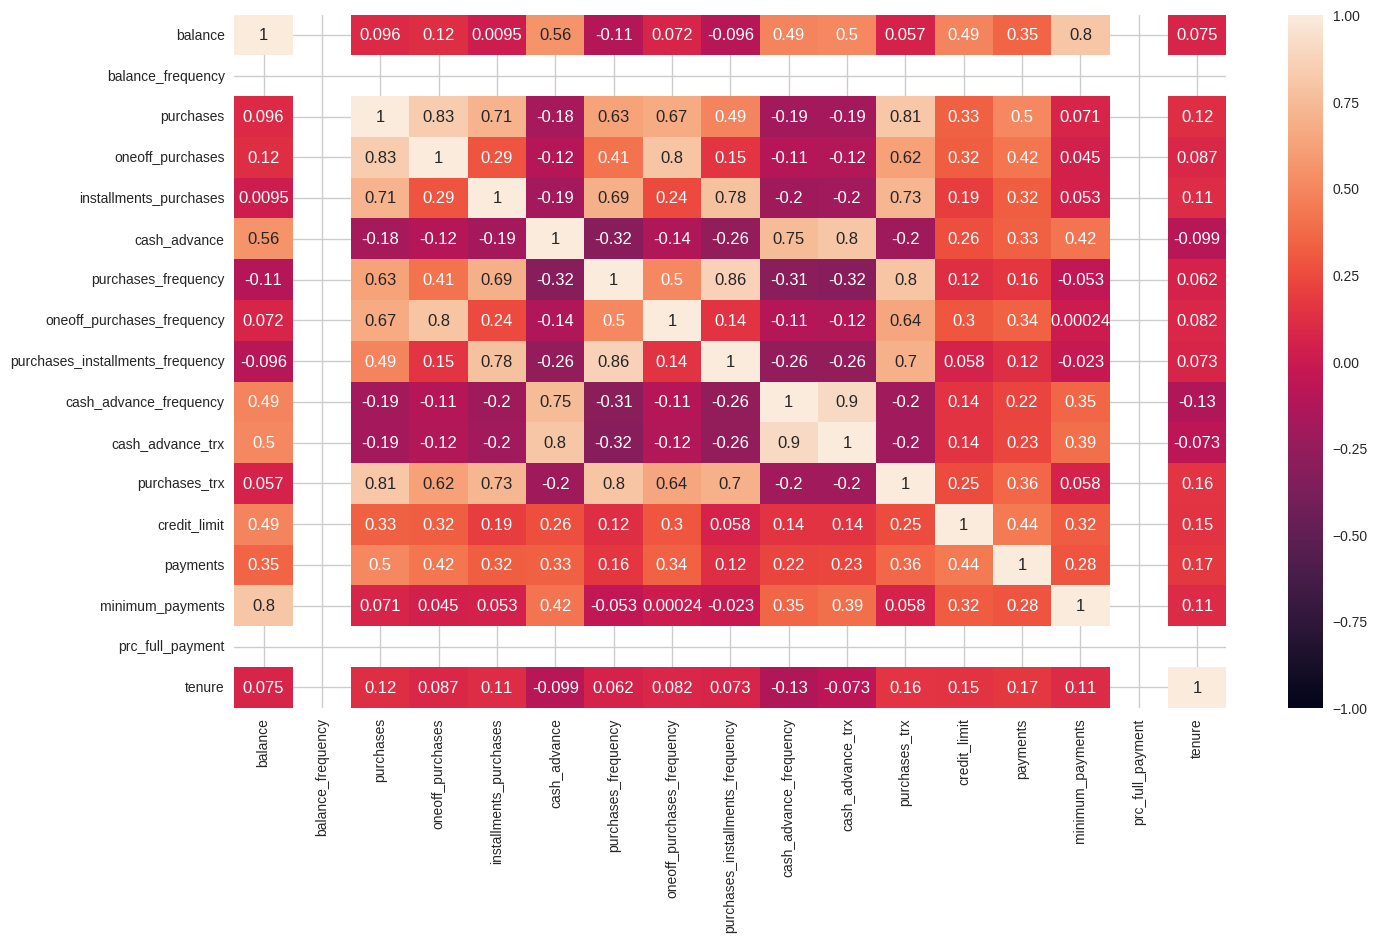

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

#Data Preprocessing

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [ ]:
# Normalizing the Data
normalized_df = normalize(df)

In [ ]:
# Converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)
normalized_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.039353,0.000962,0.091790,0.000000,0.091790,0.000000,0.000160,0.000000,0.000080,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.0,0.011546
1,0.347363,0.000108,0.000000,0.000000,0.000000,0.302081,0.000000,0.000000,0.000000,0.000027,0.000434,0.000000,0.759270,0.445044,0.116314,0.0,0.001302
2,0.310798,0.000125,0.096307,0.096307,0.000000,0.000000,0.000125,0.000125,0.000000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.0,0.001495
3,0.208091,0.000125,0.187157,0.180290,0.000000,0.025694,0.000010,0.000010,0.000000,0.000010,0.000125,0.000125,0.936409,0.000000,0.107900,0.0,0.001498
4,0.504284,0.000617,0.009867,0.009867,0.000000,0.000000,0.000051,0.000051,0.000000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.0,0.007400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.025197,0.000884,0.257438,0.000000,0.257438,0.000000,0.000884,0.000000,0.000737,0.000000,0.000000,0.005306,0.884302,0.287924,0.043230,0.0,0.005306
8946,0.013553,0.000707,0.211952,0.000000,0.211952,0.000000,0.000707,0.000000,0.000589,0.000000,0.000000,0.004239,0.706507,0.194898,0.610568,0.0,0.004239
8947,0.022773,0.000973,0.140538,0.000000,0.140538,0.000000,0.000811,0.000000,0.000649,0.000000,0.000000,0.004866,0.973257,0.079097,0.080214,0.0,0.005840
8948,0.026524,0.001971,0.000000,0.000000,0.000000,0.072055,0.000000,0.000000,0.000000,0.000328,0.003942,0.000000,0.985465,0.103572,0.109890,0.0,0.011826


In [ ]:
# Reducing the dimensions of the data
pca = PCA(n_components = 2)
pcadf = pca.fit_transform(normalized_df)
pcadf = pd.DataFrame(pcadf)
pcadf.columns = ['Principal Component 1', 'Principal Component 2']

pcadf.head(10)

,Principal Component 1,Principal Component 2
0,-0.298238,-0.033892
1,0.197926,-0.051268
2,-0.156434,-0.187386
3,-0.230862,-0.139325
4,0.193312,-0.057480
5,0.364548,0.219210
6,-0.285808,0.101018
7,0.180611,-0.115099
8,-0.290685,-0.106889
9,-0.381135,-0.058596


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


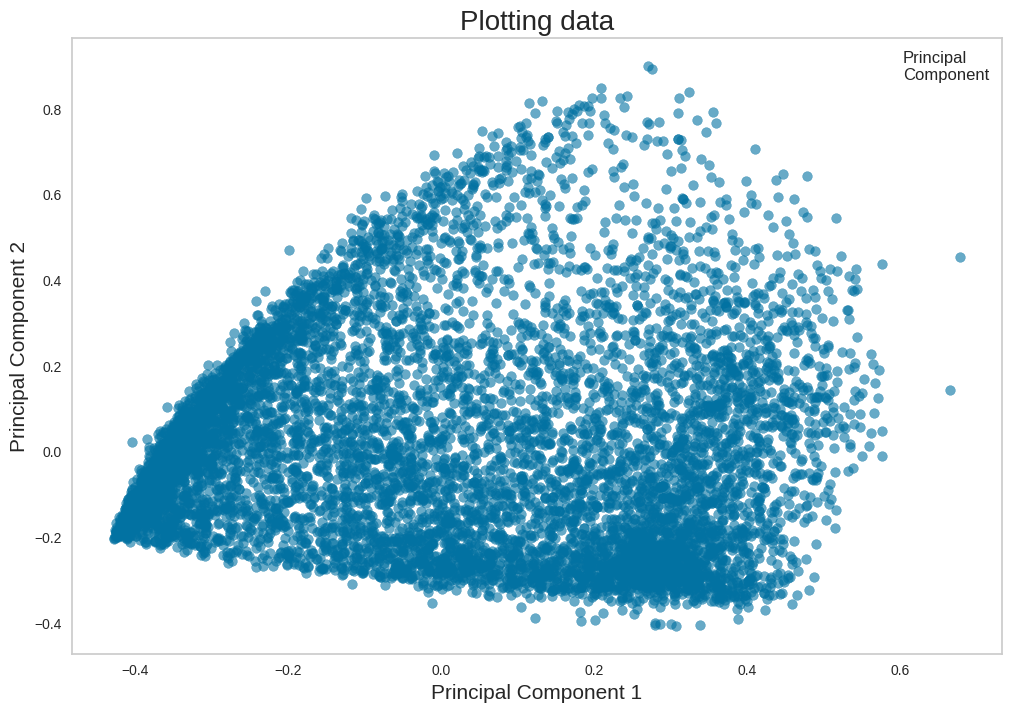

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(pcadf['Principal Component 1'],
                     pcadf['Principal Component 2'],
                     alpha=0.6)
plt.title('Plotting data', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.legend(*scatter.legend_elements(), loc="best", title="Principal\nComponent")
ax.plot([])
ax.grid()
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.36359264, 0.28458528])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

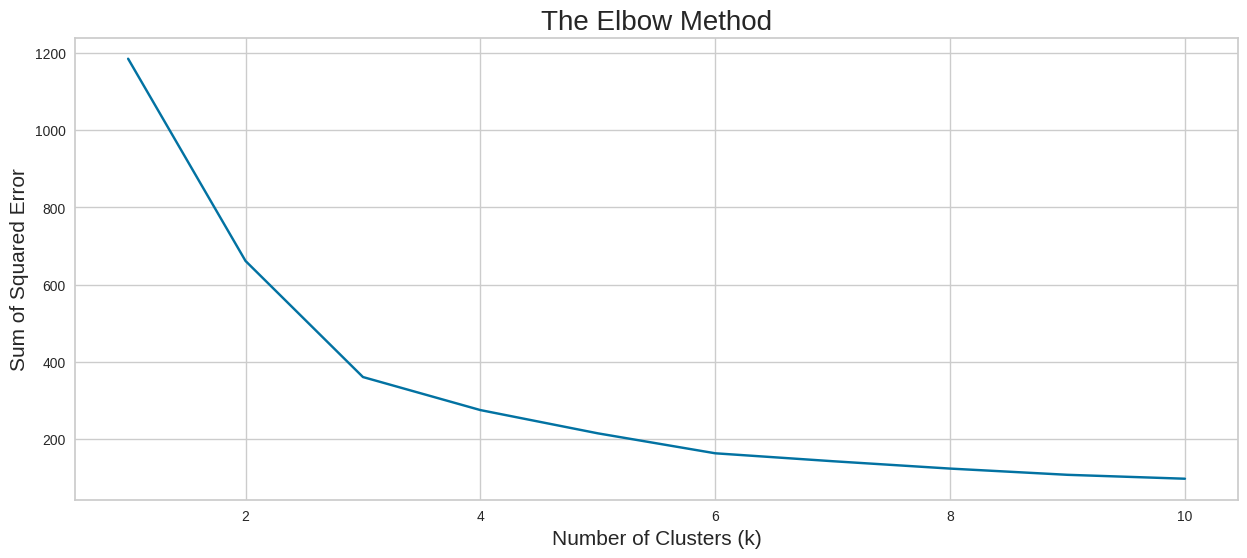

In [ ]:
sse = []
for i in range(1,11):
    kmeanModel = KMeans(n_clusters=i)
    kmeanModel.fit(pcadf)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(range(1,11), sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method', fontsize = 20)
plt.show()

Kita akan memilih 3 sebagai k(number of cluster)

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(pcadf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
pcadf['labels'] = Kmean.labels_

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

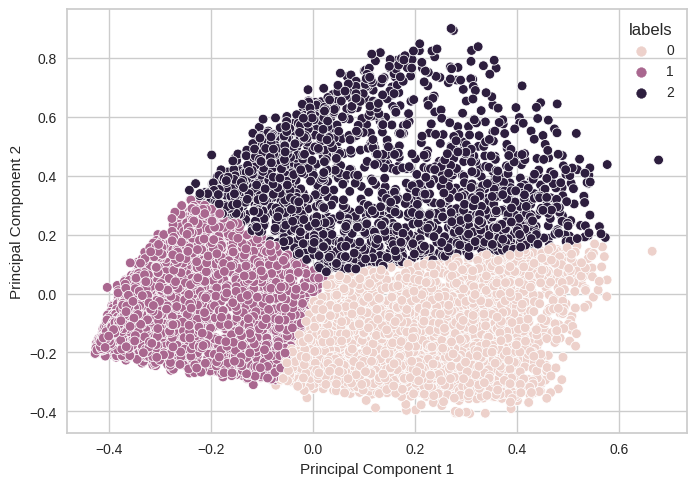

In [ ]:
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', data = pcadf, hue = 'labels')

In [ ]:
kmedoid = KMedoids(n_clusters = 3, random_state=1)
kmedoid.fit(pcadf)
pcadf['KMedoids_Labels'] = kmedoid.predict(pcadf)

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

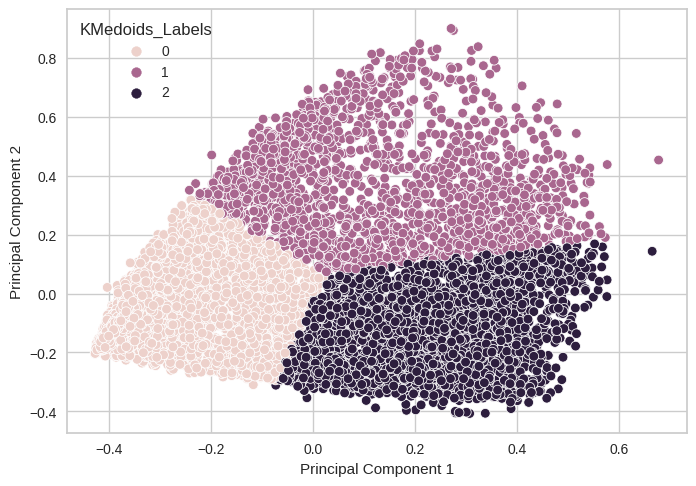

In [ ]:
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', data = pcadf, hue = 'KMedoids_Labels')

In [ ]:
dbscan = DBSCAN(eps=2,min_samples=6)
dbscan.fit(pcadf)
pcadf['DBSCAN_Labels'] = dbscan.labels_

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

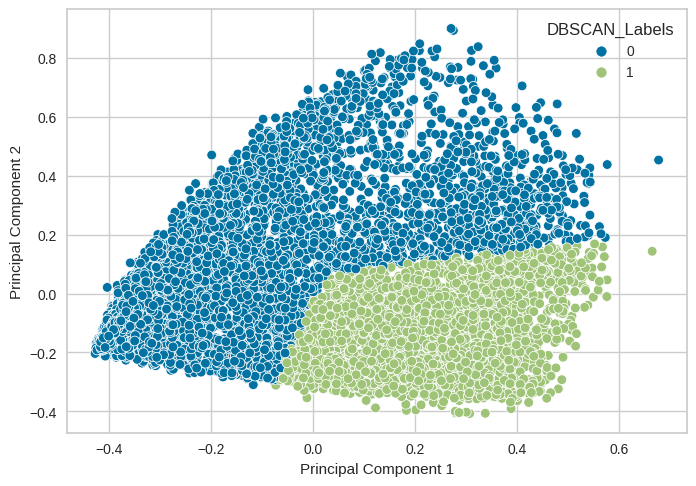

In [ ]:
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', data = pcadf, hue = 'DBSCAN_Labels')

In [ ]:
score = silhouette_score(pcadf, pcadf['labels'])
print("Silhouette score KMean : {}".format(score))

Silhouette score KMean : 0.8618743143440772


In [ ]:
score = silhouette_score(pcadf, pcadf['KMedoids_Labels'])
print("Silhouette score KMedoid : {}".format(score))

Silhouette score KMedoid : 0.8618743143440772


In [ ]:
score = silhouette_score(pcadf, pcadf['DBSCAN_Labels'])
print("Silhouette score DBSCAN : {}".format(score))

Silhouette score DBSCAN : 0.7627978426720038


#Model Inference

In [ ]:
X_to_test = pcadf.copy()

In [ ]:
to_inference = X_to_test[10:30]
to_inference

,Principal Component 1,Principal Component 2,labels,KMedoids_Labels,DBSCAN_Labels
10,0.408924,0.223294,2,1,0
11,-0.049498,0.320743,2,1,0
12,0.006958,0.258797,2,1,0
13,-0.264540,0.073961,1,0,0
14,0.290668,-0.262952,0,2,1
15,0.175833,-0.145630,0,2,1
16,0.322540,-0.322253,0,2,1
17,-0.374819,0.003486,1,0,0
18,-0.271445,-0.151572,1,0,0
19,0.264457,-0.194471,0,2,1


In [ ]:
X_to_test = pd.concat([X_to_test, pd.DataFrame(to_inference)], ignore_index = True)

In [ ]:
X_to_test = X_to_test.tail(20)
X_to_test

,Principal Component 1,Principal Component 2,labels,KMedoids_Labels,DBSCAN_Labels
8950,0.408924,0.223294,2,1,0
8951,-0.049498,0.320743,2,1,0
8952,0.006958,0.258797,2,1,0
8953,-0.264540,0.073961,1,0,0
8954,0.290668,-0.262952,0,2,1
8955,0.175833,-0.145630,0,2,1
8956,0.322540,-0.322253,0,2,1
8957,-0.374819,0.003486,1,0,0
8958,-0.271445,-0.151572,1,0,0
8959,0.264457,-0.194471,0,2,1


In [ ]:
X_to_test = X_to_test.drop(columns = ['KMedoids_Labels','labels'])

In [ ]:
kmean_model = Kmean.fit(X_to_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

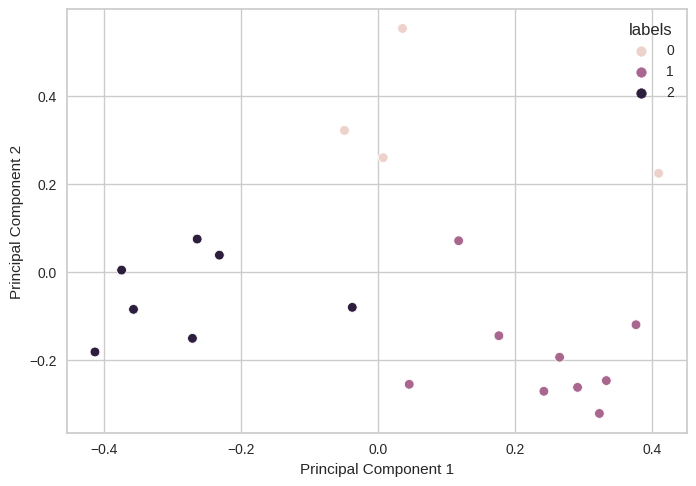

In [ ]:
X_to_test['labels'] = Kmean.labels_
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', data = X_to_test, hue = 'labels')

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

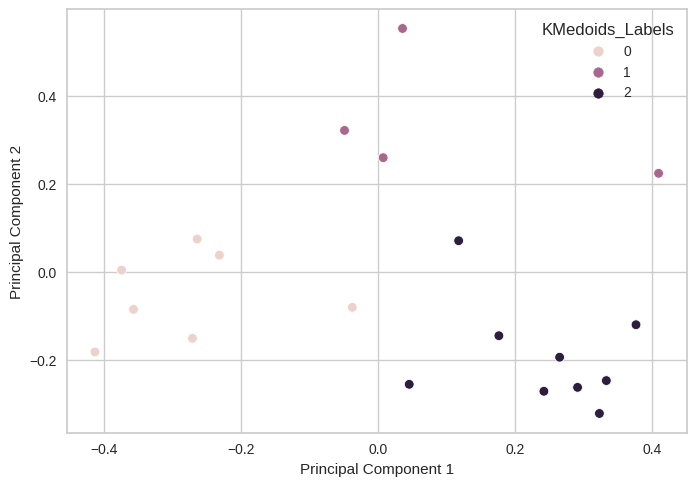

In [ ]:
kmedoid.fit(X_to_test)
X_to_test['KMedoids_Labels'] = kmedoid.predict(X_to_test)
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', data = X_to_test, hue = 'KMedoids_Labels')

<Axes: xlabel='Principal Component 1', ylabel='Principal Component 2'>

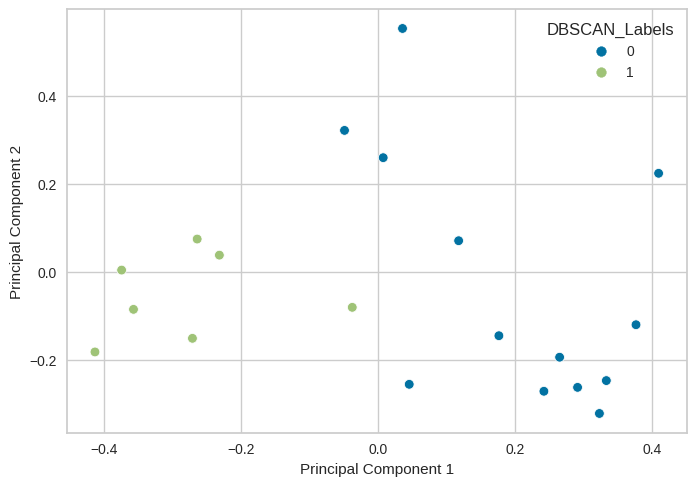

In [ ]:
dbscan.fit(X_to_test)
X_to_test['DBSCAN_Labels'] = dbscan.labels_
sns.scatterplot(x = 'Principal Component 1', y = 'Principal Component 2', data = X_to_test, hue = 'DBSCAN_Labels')

#Kesimpulan



1.   K(number of cluster) yang digunakan yakni 3
2.   Model terbaik dengan menggunakan dataset credit card adalah Kmedoid dan KMean dengan silhouette score : 0.8618743143440772

